# Usage Of Reference Data Module 
This notebook demonstrates the usage of Worldcereal Reference data module APIs

The project website: https://esa-worldcereal.org/en

The Worlcereal Reference Data Module website: https://rdm.cloud.esa-worldcereal.org/

The complete documentation of reference data APIs can be found as swagger publish here - https://rdmapi.cloud.esa-worldcereal.org/swagger/index.html

The APIs are gaurded by authentication server, so all the REST calls require login. In this notebook demo user 'demo_rdm' is used to fetch the authentication tokens. Users are requested to get their own login by sending mail to moderator-worldcereal@iiasa.ac.at. 
Once you have your credentials ready replace in the below code for fetching authentication tokens.

After you get the Authentication token you can call any api in the above url using the headers as shown in below calls.

1. Get Authorization Token for the API
2. Get All Public Collections
3. Get Features from a given collection (first collection in list)
4. Search Collections with Bounding Box, Land CoverTypes, Crop Types, Irrigation Types and Validity Time
5. Search for Feature Items with Bounding Box, Land Cover Types, Crop Types, Irrigation Types and Validity Time
6. Get Metadata of Collection 

In [16]:
##################Declarations#############################
import requests
import random

from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl, Popup, DrawControl, Rectangle) 

def random_color(feature):    
    return {
        'color': 'black',
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }

authBaseUrl = 'https://auth.cloud.esa-worldcereal.org'
apiUrl = 'https://rdmapi.cloud.esa-worldcereal.org/data'

# 1. Get Authorization Token for the API

In [ ]:
data = {
    'username': 'demo_rdm', #demo credentials used here, use your login
    'password': 'rdmlpsdemo2022', #demo credentials used here, use your password
    'client_id': 'auth',
    'grant_type': 'password',
}

tokenResponse = requests.post(f'{authBaseUrl}/realms/worldcereal/protocol/openid-connect/token', data=data)

token = tokenResponse.json()

token

Form Authentication Headers: This is required by all the REST calls in this notebook

In [ ]:

tokentype = token['token_type']
accessToken = token['access_token']
headers = {
    'Authorization': f'{tokentype} {accessToken}',
}

headers

# 2. Get All Public Collections

In [19]:
collectionResponse = requests.get(f'{apiUrl}/collections', headers=headers)
collectionResponse.json()

{'totalCount': 91,
 'items': [{'collectionId': '2016afoafpoint110',
   'title': 'MEL agronomic survey eastern Africa, 2016',
   'featureCount': 3780,
   'type': 'Point',
   'accessType': 'Public',
   'typeOfObservationMethod': 'FieldObservationSurvey',
   'confidenceLandCover': 89.2,
   'confidenceCropType': 85.7,
   'confidenceIrrigationType': 0,
   'landCovers': [11, 10],
   'cropTypes': [9998, 1200, 7100, 5100],
   'irrTypes': [0],
   'extent': {'spatial': {'bbox': [[28.892598210208625,
       -2.668523159304346,
       35.392040089688045,
       1.0134526537095285]],
     'crs': 'http://www.opengis.net/def/crs/OGC/1.3/CRS84'},
    'temporal': {'interval': [['2016-05-01T00:00:00', '2016-08-01T00:00:00']],
     'trs': 'http://www.opengis.net/def/uom/ISO-8601/0/Gregorian'}},
   'additionalData': None,
   'crs': ['http://www.opengis.net/def/crs/EPSG/0/4326'],
   'lastModificationTime': None,
   'lastModifierId': None,
   'creationTime': '2022-10-28T09:58:22.464379',
   'creatorId': Non

# 3. Get Features from a given collection

In [20]:
collectionId = collectionResponse.json()['items'][0]['collectionId']

itemUrl = f'{apiUrl}/collections/{collectionId}/items'

itemsResponse = requests.get(itemUrl, headers=headers)
itemsResponse.json()

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [35.056013770094886, 0.9243452218668288]},
   'properties': {'sampleID': '2016_AF_OAF_POINT_110699',
    'LC': 11,
    'CT': 1200,
    'IRR': 0,
    'valtime': '2016-08-01',
    'split': 'CAL'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [35.03739697006025, 0.923798033619687]},
   'properties': {'sampleID': '2016_AF_OAF_POINT_110704',
    'LC': 11,
    'CT': 1200,
    'IRR': 0,
    'valtime': '2016-08-01',
    'split': 'CAL'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [35.042416730183916, 0.9329469126596585]},
   'properties': {'sampleID': '2016_AF_OAF_POINT_110703',
    'LC': 11,
    'CT': 9998,
    'IRR': 0,
    'valtime': '2016-08-01',
    'split': 'CAL'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [35.05771797989848, 0.9322053050458716]},
   'properties': {'sampleID': '201

# 4. Search Collections with Bounding Box, Land CoverTypes, Crop Types, Irrigation Types and Validity Time
The data APIs provide a way to search for collections with filter parameters. Refer the swagger documentation for filter details.
The below script demonstrates how we can call the REST APIs to search for the collections.

## Search Bounding Box

In [21]:
center=[47.506186,16.410999]
zoom=4
m1=Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=zoom)
#42.972502,-9.755859,55.128649,16.875000
aoi = Rectangle(bounds=[[ 42.972502,-9.755859], [ 55.128649,16.875000]], color="tomato", weight=2) 

#add layers
m1.add_layer(aoi)

# display map
m1

Map(center=[47.506186, 16.410999], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [22]:
bbox='&Bbox=-9.755859&Bbox=42.972502&Bbox=16.875000&Bbox=55.128649' #bbox: minimum longitude, minimum latitude, maximum longitude and maximum latitude 
valTime='ValidityTime.Start=2019-01-01T00%3A00%3A00Z&ValidityTime.End=2019-12-30T00%3A00%3A00Z' # date time in yyyy-MM-ddTHH:mm:ssZ format with url escaped
landcovers='&LandCoverTypes=11' #annual cropland
cropTypes='&CropTypes=1100&CropTypes=1110&CropTypes=1120' # wheat, winter wheat and spring wheat
irrigationTypes='&IrrigationTypes=0'
colSearchUrl=f'{apiUrl}/collections/search?{valTime}{landcovers}{cropTypes}{irrigationTypes}{bbox}'

colSearchResponse = requests.get(colSearchUrl, headers=headers)
colSearchResponse.json()

[{'collectionId': '2019frignrpgpoly110',
  'title': 'France LPIS 2019',
  'featureCount': 9604463,
  'type': 'Polygon',
  'accessType': 'Public',
  'typeOfObservationMethod': 'FormalDeclaration',
  'confidenceLandCover': 100,
  'confidenceCropType': 94,
  'confidenceIrrigationType': 0,
  'landCovers': [11, 10, 13, 12, 0, 40, 99, 60, 30, 20],
  'cropTypes': [1110,
   1200,
   0,
   9120,
   1620,
   1510,
   4351,
   5100,
   7900,
   9910,
   8100,
   9520,
   9213,
   7700,
   1910,
   4100,
   1700,
   3900,
   2340,
   7100,
   2190,
   1920,
   4380,
   1120,
   1400,
   6219,
   1900,
   7920,
   9998,
   2310,
   7300,
   1610,
   7500,
   9300,
   9900,
   3450,
   2160,
   2260,
   9310,
   3300,
   4330,
   6229,
   4352,
   2390,
   2320,
   2220,
   2230,
   4420,
   2170,
   1800,
   2130,
   7600,
   9510,
   4390,
   2350,
   3640,
   2210,
   2110,
   2330,
   3690,
   1300,
   3630,
   3530,
   6212,
   9320,
   9600,
   3550,
   3200,
   4000,
   2150,
   2240,
   3560

Display results on map

In [23]:
center=[47.506186,16.410999]
zoom=3
m2=Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=zoom)

cols = colSearchResponse.json()

for col in cols:
  #print(col['extent']['spatial']['bbox'][0])
  colbbox = col['extent']['spatial']['bbox'][0]
  bbox = [[colbbox[1],colbbox[0]],[colbbox[3],colbbox[2]]]
  aoi2 = Rectangle(bounds=bbox, color="green", weight=2 ) 
  m2.add_layer(aoi2)

m2.add_layer(aoi)

# display map
m2

Map(center=[47.506186, 16.410999], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

# 5. Search for Feature Items with Bounding Box, Land Cover Types, Crop Types, Irrigation Types and Validity Time


In [24]:
colbbox = cols[0]['extent']['spatial']['bbox'][0]
itembbox = [[colbbox[1],colbbox[0]],[colbbox[3],colbbox[2]]]
print(itembbox)
itemSearchCollectionId=cols[0]['collectionId']
itemSearchUrl = f'{apiUrl}/collections/{itemSearchCollectionId}/items?{valTime}{landcovers}{cropTypes}{irrigationTypes}{itembbox}&MaxResultCount=100'
itemSearchResponse = requests.get(itemSearchUrl, headers=headers)
itemSearchResponse.json()

[[41.367527190763816, -4.903114789848235], [51.07510062401376, 9.553096733466345]]


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[2.553203029003446, 48.23633615390489],
      [2.5535111079055692, 48.235605825747726],
      [2.5539462623605385, 48.2345870059383],
      [2.5533621363267023, 48.23441112548075],
      [2.5533598405004714, 48.23441472314049],
      [2.552763850935118, 48.23578017155772],
      [2.5527242108413137, 48.23583249692929],
      [2.5524933238217757, 48.23618392415061],
      [2.5525604240519564, 48.236211833917906],
      [2.553203029003446, 48.23633615390489]]]},
   'properties': {'sampleID': 'fr2019lpis11130588',
    'LC': 11,
    'CT': 1110,
    'IRR': 0,
    'valtime': '2019-06-01',
    'split': 'CAL',
    'area': 10005.34986709}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[2.612117764305204, 49.01825373843664],
      [2.6117559596763296, 49.018385544896816],
      [2.611745347485185, 49.01839876474138],
      [2.6117442596568083, 4

## Display first 100 Results on Map. 
The APIs are page based, the skip and max count needs to be used to get all the results page wise

In [25]:
from ipywidgets import Text, HTML
center=[48.191924545559125,3.6786475005980637]
zoom=7
m=Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=zoom,close_popup_on_click=False)

aoi = Rectangle(bounds=itembbox, color="green", weight=2) 

data = itemSearchResponse.json()
layer= GeoJSON(
    data=data,
    style={
        'opacity': 1, 'fillOpacity': 0.5, 'weight': 2
    },
    hover_style={
        'color': 'white', 'dashArray': '0', 'fillOpacity': 0.5
    },
    point_style={'radius': 5, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    style_callback=random_color
)


#add layers
m.add_layer(aoi)
m.add_layer(layer)
#m.add_control(control)

# display map
m




Map(center=[48.191924545559125, 3.6786475005980637], close_popup_on_click=False, controls=(ZoomControl(options…

Below Image is sample output only.

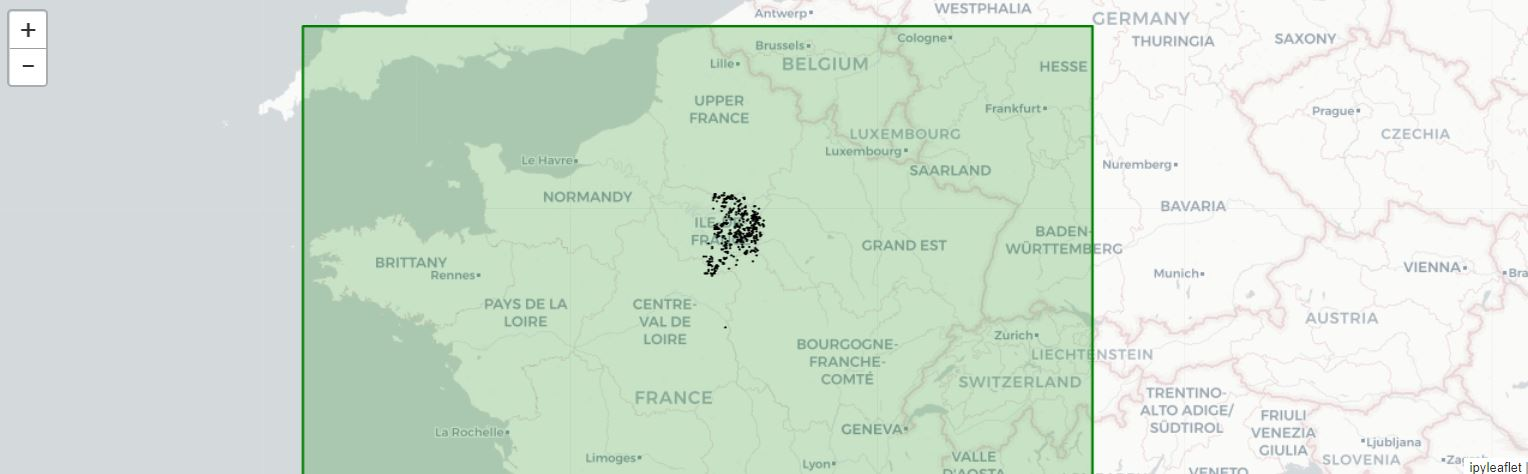

In [26]:
from IPython.display import Image
Image(filename='image.jpg') 

# 6. Get Metadata of Collection

Get Json

In [ ]:
colId = '2019frignrpgpoly110'
metadataUrl = f'{apiUrl}/collections/{colId}/metadata/items'
metadata = requests.get(metadataUrl, headers=headers)
metadata.json()

Get Excel

<Response [200]>
2019frignrpgpoly110_metadata.xlsx saved to local path


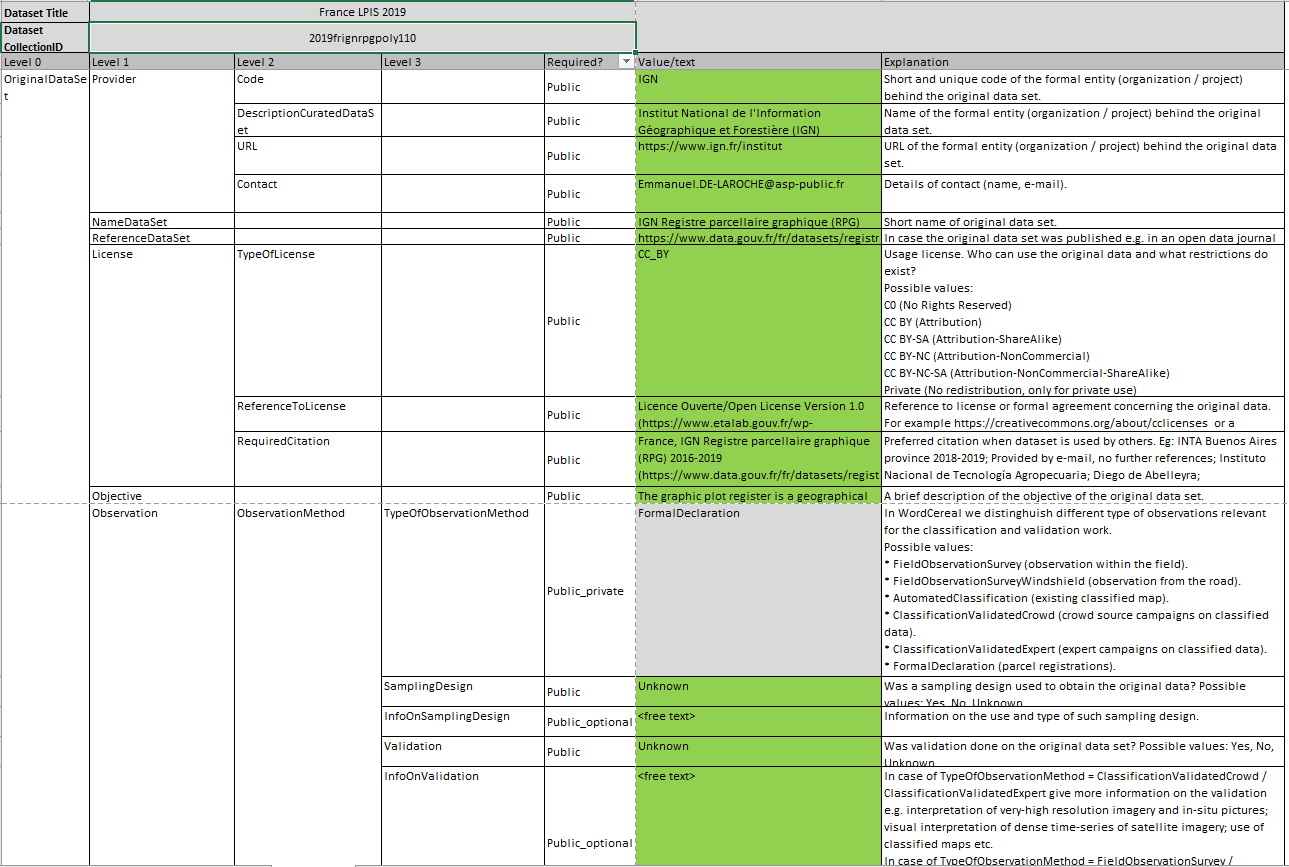

In [29]:
excelUrl = f'{apiUrl}/collections/{colId}/metadata/download'
response = requests.get(excelUrl, headers=headers)
print(response)
fileName=f"{colId}_metadata.xlsx"
open(fileName, "wb").write(response.content)
print(f"{fileName} saved to local path")
# Sample Excel Output
Image(filename='meta.jpg') 
